In [5]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
X_train, y_train = load_mnist('./', kind='train')

In [7]:
print(type(X_train))
print(len(X_train))
print(len(X_train[0]))
print(type(y_train))
print(len(y_train))

<class 'numpy.ndarray'>
60000
784
<class 'numpy.ndarray'>
60000


In [8]:
print(X_train.shape)
y_train

(60000, 784)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [10]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [11]:
# Subset first 20k data points to visualize
x_subset = X_train[0:60000]
y_subset = y_train[0:60000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.6229264736175537 seconds


In [9]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.09704664 0.07095924 0.06169089 0.05389419]


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(1011.5146017802443, -183.35501509919288, '0'),
  Text(-876.6966423261126, -435.4609667475821, '1'),
  Text(72.410902407133, -268.5312520781182, '2'),
  Text(57.537572423034135, -486.79428170917856, '3'),
  Text(-89.9260714996401, 578.8254667760491, '4'),
  Text(96.3681748536744, -143.26892573779654, '5'),
  Text(156.09573780691449, -17.480131341085063, '6'),
  Text(-285.20704994282045, 616.9305588521737, '7'),
  Text(-48.95324178409591, -221.996074418688, '8'),
  Text(-188.76806843334631, 589.34975977641, '9')])

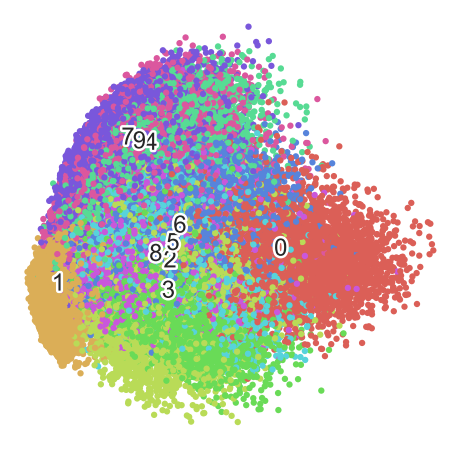

In [10]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [13]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS , perplexity = 30).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

KeyboardInterrupt: 

<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 30')

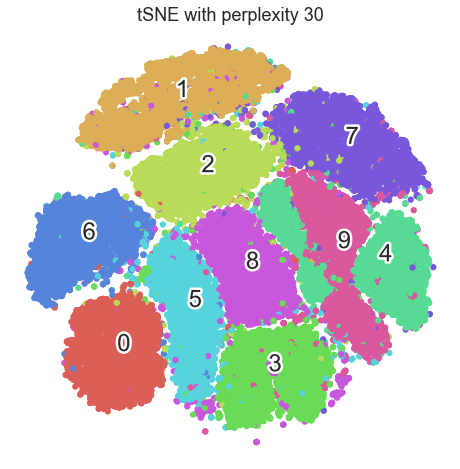

In [17]:
perplexity = 30
fashion_scatter(fashion_tsne, y_subset)
plt.title("tSNE with perplexity %d" % perplexity)

In [16]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 2.55353045463562 seconds
Cumulative variance explained by 50 principal components: 0.8246211153295397


In [14]:
import time
time_start = time.time()

fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 450.12911677360535 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 30 after PCA')

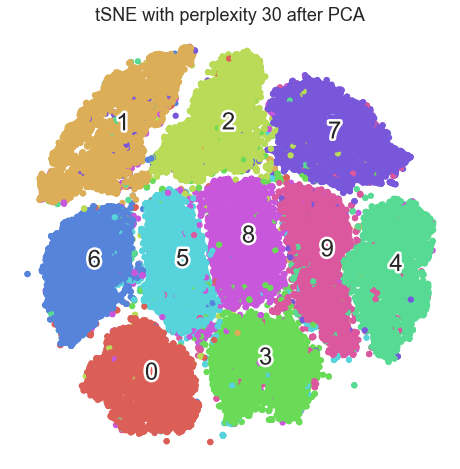

In [31]:
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 473.82847476005554 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 40 after PCA')

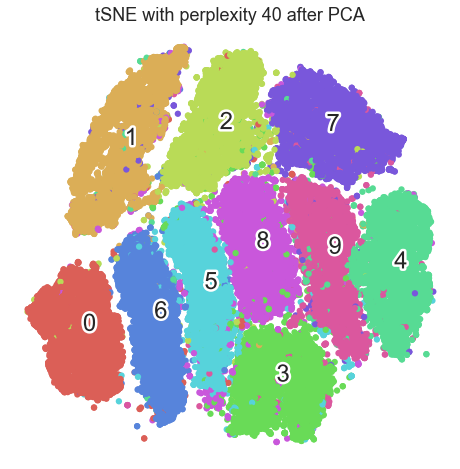

In [33]:
import time
time_start = time.time()
perplexity = 40
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 454.4789671897888 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 50 after PCA')

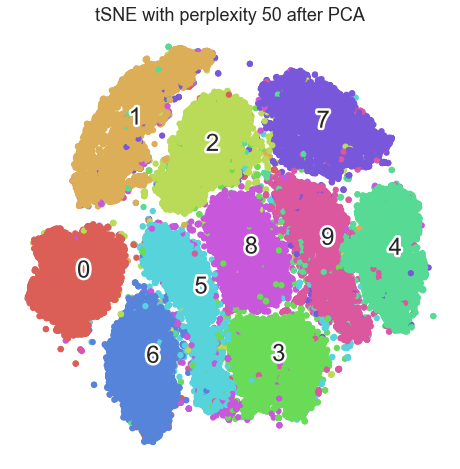

In [34]:
time_start = time.time()
perplexity = 50
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 534.4769065380096 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 60 after PCA')

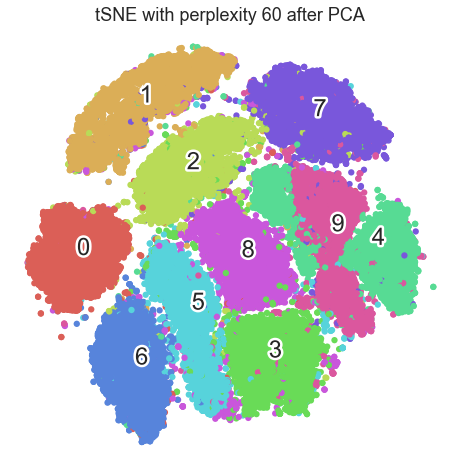

In [35]:
time_start = time.time()
perplexity = 60
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 419.8056263923645 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 70 after PCA')

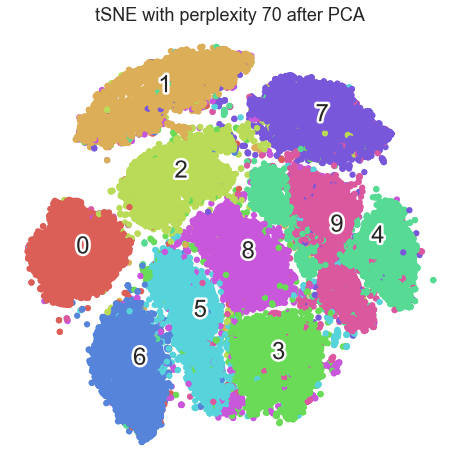

In [39]:
time_start = time.time()
perplexity = 70
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 309.0862047672272 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 5 after PCA')

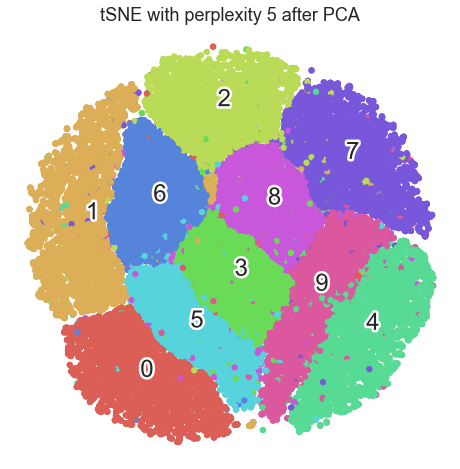

In [36]:
time_start = time.time()
perplexity = 5
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 316.8594696521759 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 10 after PCA')

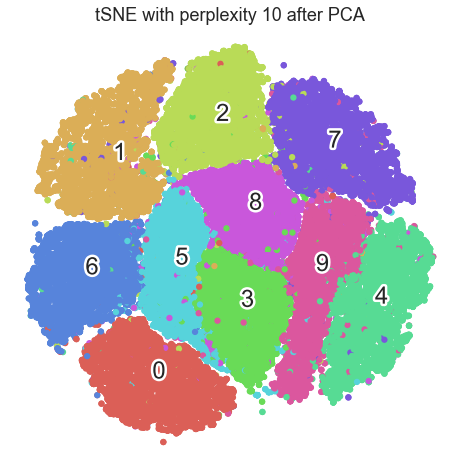

In [37]:
time_start = time.time()
perplexity = 10
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 332.47184681892395 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 20 after PCA')

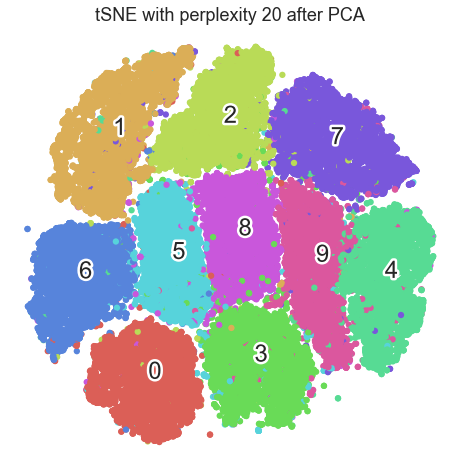

In [38]:
time_start = time.time()
perplexity = 20
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 455.47679257392883 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 0 after PCA')

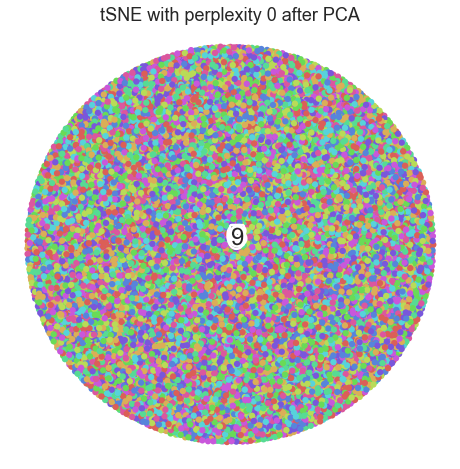

In [40]:
time_start = time.time()
perplexity = 0
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

t-SNE after PCA done! Time elapsed: 610.4335203170776 seconds


<ipython-input-6-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 100 after PCA')

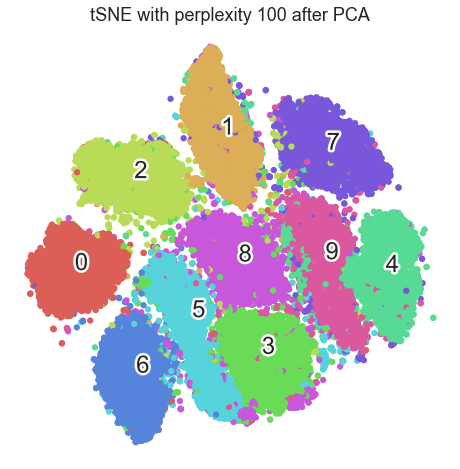

In [41]:
time_start = time.time()
perplexity = 100
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

In [17]:
def run_TSNE(perplexity , learning_rate):
    from sklearn.manifold import TSNE
    import time
    ime_start = time.time()
    fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity , learning_rate=learning_rate).fit_transform(pca_result_50)
    print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
    fashion_scatter(fashion_pca_tsne, y_subset)
    plt.title("tSNE with perplexity %d after PCA learning-rate:%d" % (perplexity , learning_rate))

t-SNE after PCA done! Time elapsed: 454.50228452682495 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 861.5371549129486 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


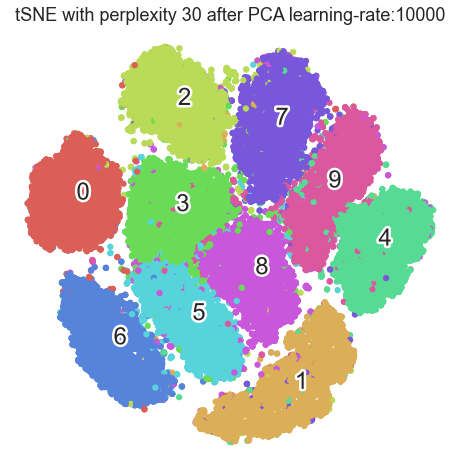

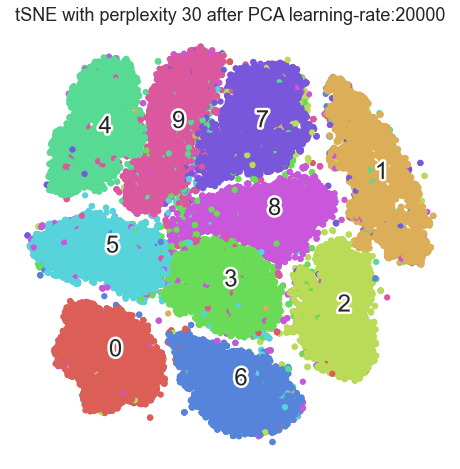

In [19]:
for i in [10000 , 20000]:
    run_TSNE(30 , i)

t-SNE after PCA done! Time elapsed: 1493.6010990142822 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 1874.4491012096405 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 2238.447876930237 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 2612.847822904587 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 2986.7986390590668 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 3366.0461978912354 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 3748.7052807807922 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 4156.473730325699 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


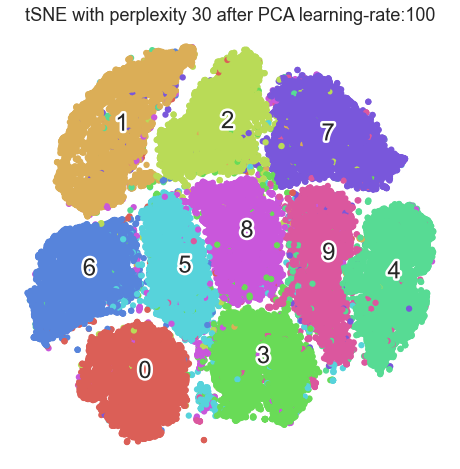

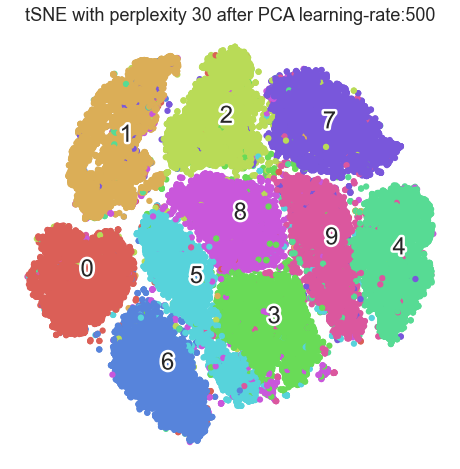

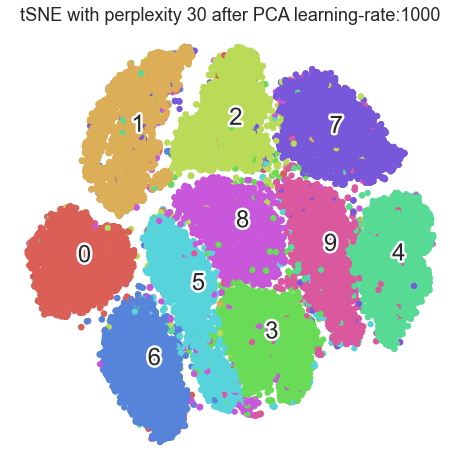

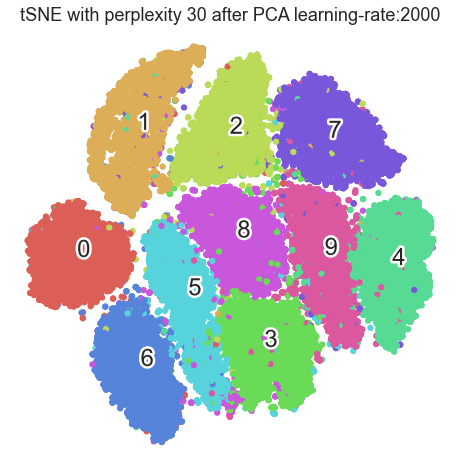

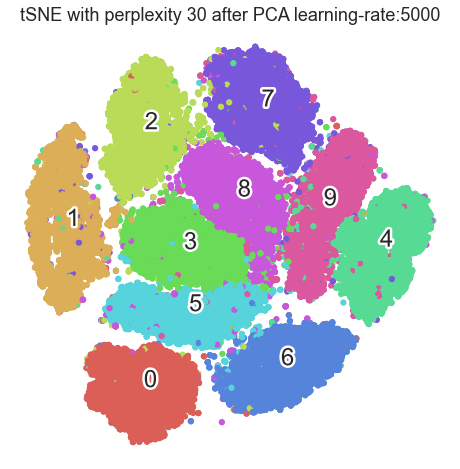

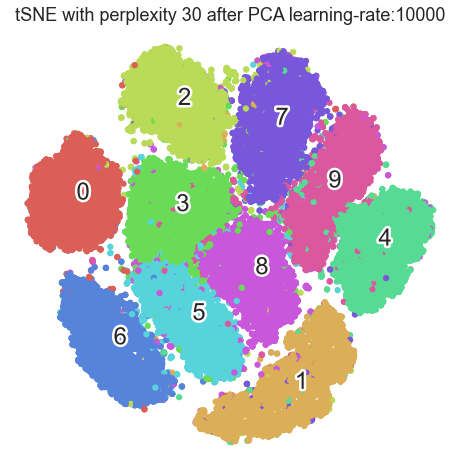

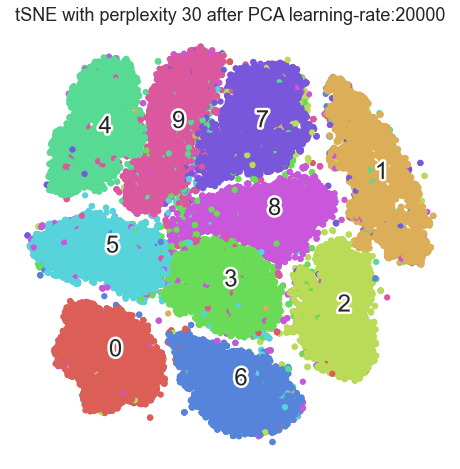

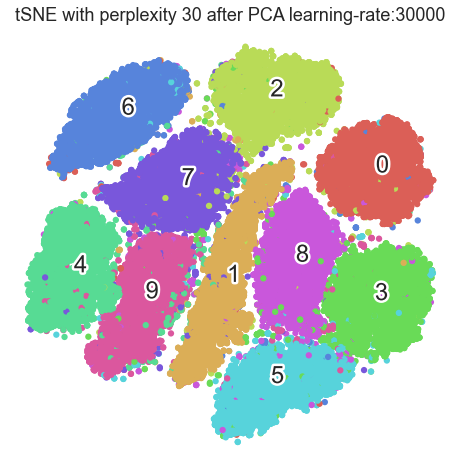

In [20]:
for i in [100 , 500 , 1000 , 2000 , 5000 , 10000 , 20000 , 30000]:
    run_TSNE(30 , i)

t-SNE after PCA done! Time elapsed: 27430.869332790375 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


Text(0.5, 1.0, 'tSNE with perplexity 1000 after PCA')

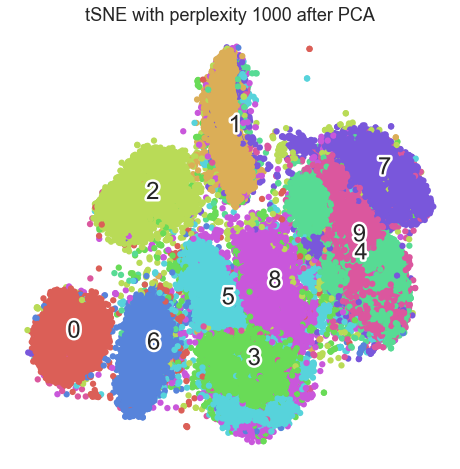

In [21]:
time_start = time.time()
perplexity = 1000
fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity).fit_transform(pca_result_50)
print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
fashion_scatter(fashion_pca_tsne, y_subset)
plt.title("tSNE with perplexity %d after PCA" % perplexity)

In [22]:
def run_TSNE(perplexity , early_exaggeration):
    from sklearn.manifold import TSNE
    import time
    ime_start = time.time()
    fashion_pca_tsne = TSNE(random_state=RS , perplexity = perplexity , early_exaggeration=early_exaggeration).fit_transform(pca_result_50)
    print('t-SNE after PCA done! Time elapsed: {} seconds'.format(time.time() - time_start))
    fashion_scatter(fashion_pca_tsne, y_subset)
    plt.title("tSNE with perplexity %d after PCA early_exaggeration:%d" % (perplexity , early_exaggeration))

t-SNE after PCA done! Time elapsed: 27785.46512579918 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 28145.84494662285 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 28499.906470537186 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 34597.495530843735 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 34965.458265542984 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


t-SNE after PCA done! Time elapsed: 35321.42491674423 seconds


<ipython-input-10-06ae684fbde5>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


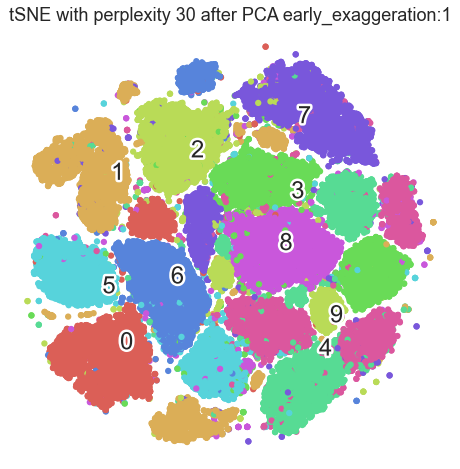

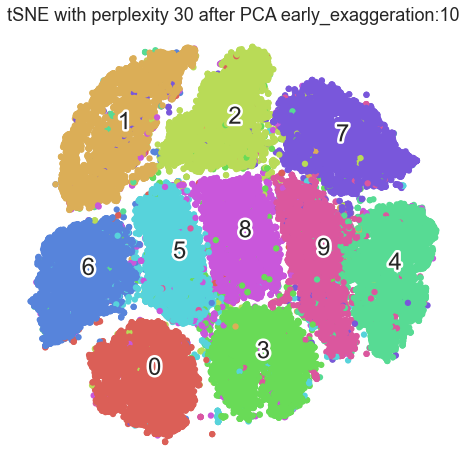

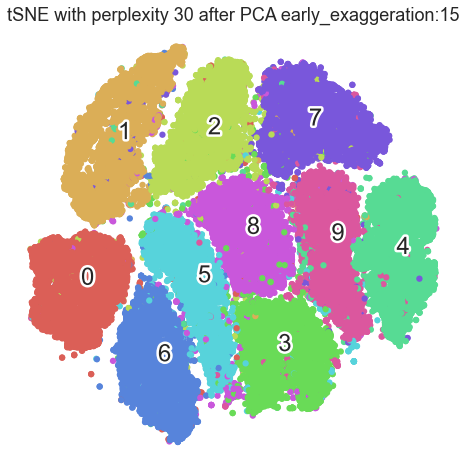

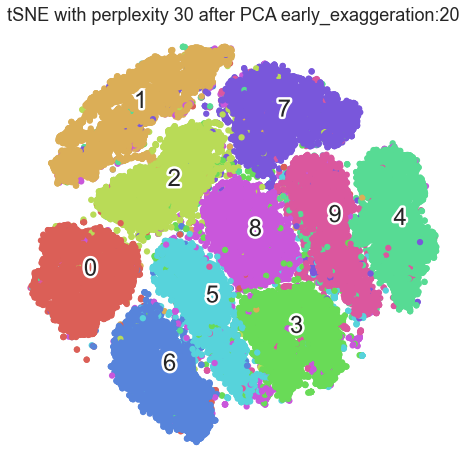

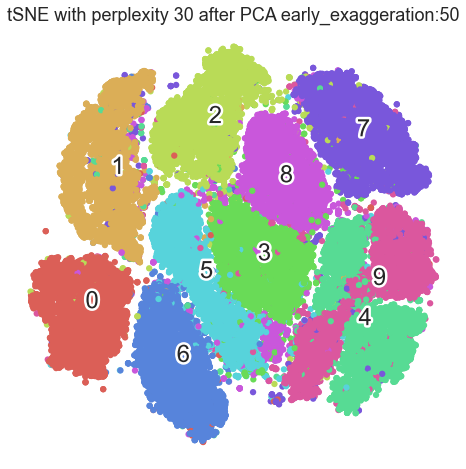

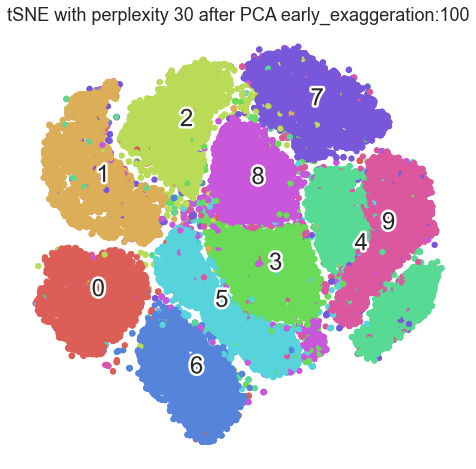

In [23]:
for i in [1 , 10 , 15 , 20 , 50 , 100]:
    run_TSNE(30 , i)